# Practical Notebook 2

## Pandas

In this course, we will use pandas to import the data into DataFrame objects.   
Pandas is a commonly used library working with and manipulating data in various formats, such as txt, csv, excel format, and more.  

You can read more about pandas [here](https://pandas.pydata.org/), or by searching online.

In [ ]:
# The first thing we need to do is to import pandas
import pandas as pd

# We will aslo change how the floating point numbers are displayed (basically displaying 5 decimal points)
pd.set_option("display.float_format", lambda x: f"{x:.5f}")

### Creating our own dataset to file

We will start by creating our own data set, but later on we will import the data from a file.

In [ ]:
names = ['Alice', 'Bob', 'Charlie']
animals = ['Dog', 'Cat', None]
age = [27, 12, 43]
sex = ['Female', 'Male', 'Male']

We will then merge the lists together using the *zip* function.

In [ ]:
people = list(zip(names, animals, age, sex))
print(people)

Now we can make our merged list into a DataFrame object by using pandas.

In [ ]:
df = pd.DataFrame(data=people, columns=['Names','Animals','Age','Sex'])
print(df)

You can also export the dataframe to a csv file, where we use the function *to_csv* to export the file. You will find the file you created in the folder you are in. (In colab you will find the folder to the left.)
The index parameter is set to *False*, i.e. we won't write the row names to the new file (in this case the row names are *0, 1, 2*). The header parameter is set to *True*, i.e. we will write the column names to the file (in this case the column names are *Names*, *Animals*, *Age*, *Sex*).
You can change these parameters yourself to see the difference.

In [ ]:
df.to_csv('test_people.csv', index=False, header=True)

### Read a dataset from file

To read the data from a csv file we will use the function *read_csv*.

In [ ]:
df = pd.read_csv('test_people.csv')
print(df)

We can inspect the numerical values in the data using the function describe.

In [ ]:
print(df.describe())

And look at one specific column by using the names of the header.

In [ ]:
print(f"Here you will see the names: \n{df['Names']}")
print(f"\nHere you will see the animals: \n{df['Animals']}")
print(f"\nHere you will see the ages: \n{df['Age']}")
print(f"\nHere you will see the sex: \n{df['Sex']}")

You can also divide the groups into females and males.

In [ ]:
male, female = df['Sex'].value_counts()
print(f"Here we have {male} male(s) and {female} female(s).")

By looking only at one column, as we did before, we can find some interesting data about it as well.

In [ ]:
# finding the mean value of the ages (with 2 decimals)
print(f"mean: {df['Age'].mean():.2f}")
# and the standard deviation (with 2 decimals)
print(f"std: {df['Age'].std():.2f}")

### Titanic

Now we will download and use a larger dataset, to get a better understanding about the pandas library. The dataset contains passenger data from Titanic, and later on we will predict "what sort of people were most likely to survive?". The passenger data has 7 features: Name, Sex, Socio-economic class, Siblings/Spouses Aboard, Parents/Children Aboard and Fare and a binary responce variable "survived".

In [ ]:
# Downloading the titanic dataset
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

#### Assignment a)

In [ ]:
# ASSIGNMENT:
# Load the data and get familiar with it 
# Use the .describe() method to inspect numerical values

df = pd.read_csv('titanic.csv')
print(df)
#print(df.describe())

#### Assignment b)

In [195]:
# ASSIGNMENT:
# Count the number of males and females
male, female = df['Sex'].value_counts()
print(male, female)

573 314


#### Assignment c)

In [ ]:
# ASSIGNMENT:
# Find the mean fare and display with 2 floating point numbers
mean_fare = df['Fare'].mean()
print(f"mean: {mean_fare:.2f}")
# Find the standard deviation of the fare and display with 2 floating point numbers
std_fare = df['Fare'].std()
print(f"std: {std_fare:.2f}")

#### Assignment d)

In [ ]:
# ASSIGNMENT:
# Count how many survived (1) and how many died (0)

# YOUR CODE HERE
died, survived = df['Survived'].value_counts()
print(died, survived)

#### Assignment e)

In [ ]:
# ASSIGNMENT:
# count and display the number of women who surived 
# and the number of men who survived

# YOUR CODE HERE

female_survived, male_survived = df.groupby('Sex')['Survived'].sum()
print(female_survived, male_survived)

#### Assignment f)

In [ ]:
# ASSIGNMENT:
# Separate the dataset from Titanic into X and y,
# where y is the column Survived, and X is the rest.
# Inspect the data. Look at for instance the function "describe" in pandas

# YOUR CODE HERE
X = df.drop('Survived', axis=1)
y = df.Survived

x_describe = X.describe()
y_describe = y.describe()
print(y_describe)

#### Assignment g)

In [ ]:
# ASSIGNMENT:
# Standardize the data by subtracting the mean and dividing by the standard deviation.
# Inpect the data again to see that the mean is (close to) zero and the standard deviation is one.

# YOUR CODE HERE

X_new = X.sub(X.mean()).div(X.std())
y_new = y.sub(y.mean()).div(y.std())

# Inspecting the data again:
X_new_describe = X_new.describe()
y_new_describe = y.describe()

print(X_new_describe, y_new_describe)

## Matplotlib

Matplotlib is a commonly used library for visualizing data in Python. Other visualization libraries exist for Python, such as seaborn, plotly, and more. Beyond the first practical notebook, we do not enforce any particular plotting library, but strongly encourage the use of Matplotlib. Below we will use the plotting functions inside of *matplotlib.pyplot*. You can read more about matplotlib [here](https://matplotlib.org/) and pyplot [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot).

### Examples

In [ ]:
# import the relevant libraries
import matplotlib.pyplot as plt
import numpy as np

We will start by looking at some small lists.

In [ ]:
# examples of some datapoint
x = [1,2,3,4]
y = [2,3.5,7,8.2]

# plotting the data using matplotlib.pyplot.plot
plt.plot(x, y)

# It is important to add labels for the axes and a title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plotting with matplotlib")
# and always end with show(), which will show you the plot.
plt.show()

Plots can also be below each other, or side by side by using [subplot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplot.html).

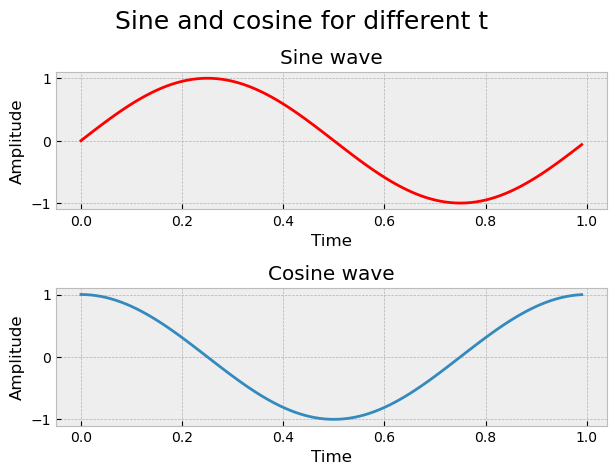

In [143]:
# Vertical subplot

plt.style.use('bmh')

t = np.arange(0.0, 1.0, 0.01)
sin = np.sin(2*np.pi*t)
cos = np.cos(2*np.pi*t)

fig = plt.figure()
fig.suptitle("Sine and cosine for different t", fontsize=18)

ax1 = fig.add_subplot(2,1,1)
ax1.plot(t, sin, color='red', lw=2)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time')
ax1.set_title('Sine wave')

ax2 = fig.add_subplot(2,1,2)
ax2.plot(t, cos)
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time')
ax2.set_title('Cosine wave')

fig.tight_layout() # comment out this line to see the difference
fig.subplots_adjust(top=0.85)
plt.show()

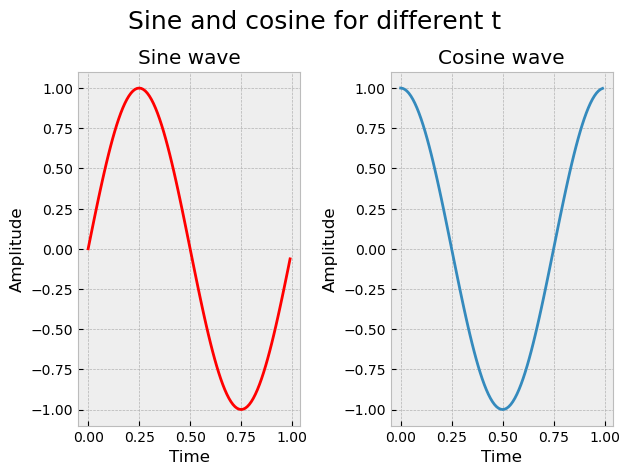

In [152]:
# Horizontal subplot

plt.style.use('bmh')

t = np.arange(0.0, 1.0, 0.01)
sin = np.sin(2*np.pi*t)
cos = np.cos(2*np.pi*t)

fig = plt.figure()
fig.suptitle("Sine and cosine for different t", fontsize=18)

ax1 = fig.add_subplot(1,2,1)  # we have changed (2,1,1) to (1,2,1)
ax1.plot(t, sin, color='red', lw=2)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time')
ax1.set_title('Sine wave')

ax2 = fig.add_subplot(1,2,2)  # we have changed (2,1,2) to (1,2,2)
ax2.plot(t, cos)
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time')
ax2.set_title('Cosine wave')

fig.tight_layout() # comment out this line to see the difference
fig.subplots_adjust(top=0.85)
plt.show()

And with different stylings

In [ ]:
# Here are all the different "pre-configured" styles matplot lib supports
# https://matplotlib.org/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py 
plt.style.available

The plotts can also be both below each other and side by side at the same time (as a matrix) as you can see below. Here we have also plotted two graphs together in every figure, and added a color and a label for each one of them.

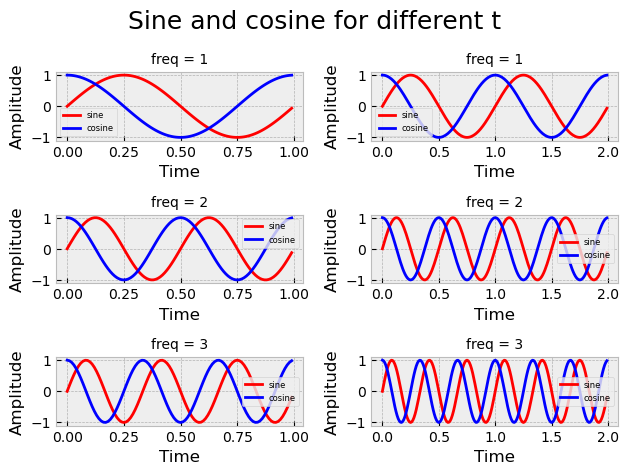

In [167]:
# Matrix subplot

fig = plt.figure()
fig.suptitle("Sine and cosine for different t", fontsize=18)

i = 1
for freq in [1, 2, 3]:
  for t_max in [1, 2]:
    t = np.arange(0.0, t_max, 0.01)
    sin = np.sin(2*freq*np.pi*t)
    cos = np.cos(2*freq*np.pi*t)

    ax = fig.add_subplot(3,2,i)
    ax.plot(t, sin, color='red', lw=2, label='sine')
    ax.plot(t, cos, color='blue', lw=2, label='cosine')
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Time')
    ax.legend(fontsize=6)
    ax.set_title(f'freq = {freq}', fontsize=10)
    i += 1

fig.tight_layout() # comment out this line to see the difference
fig.subplots_adjust(top=0.85)
plt.show()

### Plotting data from Pandas

Now we will plot some of the datapoints from the titanic dataset to visualize it.

In [ ]:
# Downloading the titanic dataset
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

In [ ]:
# Load the titanic dataset for plotting
import pandas as pd
df = pd.read_csv('titanic.csv')

#### Assignment h)

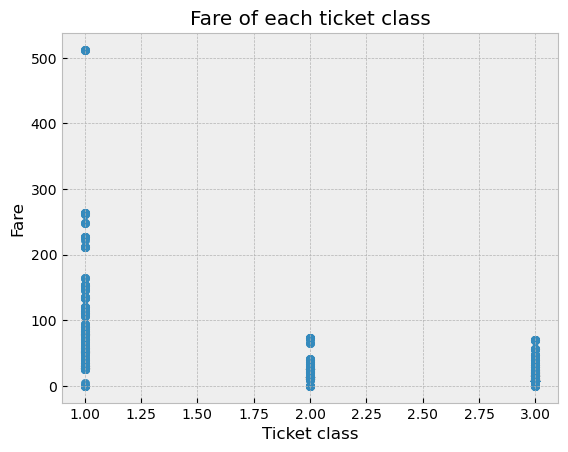

In [185]:
# ASSIGNMENT:
# make a scatterplot of the class of ticket in the x axis
# and the fare on the y axis
# label the plot and the axes appropriately

# YOUR CODE HERE
x = df.Pclass
y = df.Fare

plt.xlabel("Ticket class")
plt.ylabel("Fare")
plt.title("Fare of each ticket class")
plt.scatter(x,y)
plt.show()

#### Assignment i)

It might also be a good idea to plot a histogram over the data, to get a better understanding of how the data looks. This can be done using the function *hist* from matplotlib.

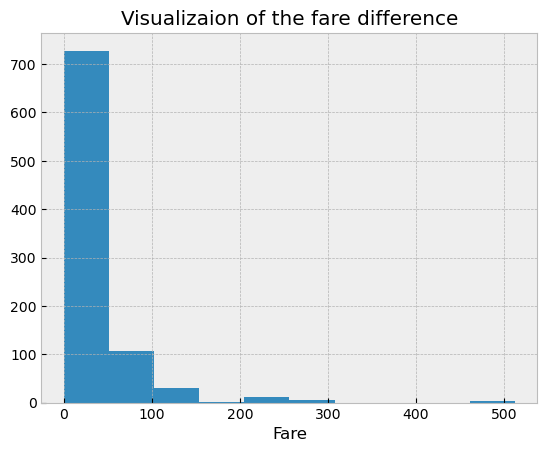

In [114]:
fare = df["Fare"]
plt.hist(fare)
plt.xlabel("Fare")
plt.title("Visualizaion of the fare difference")
plt.show()

As you can see, most of the people paid less than 150 for the ticket.

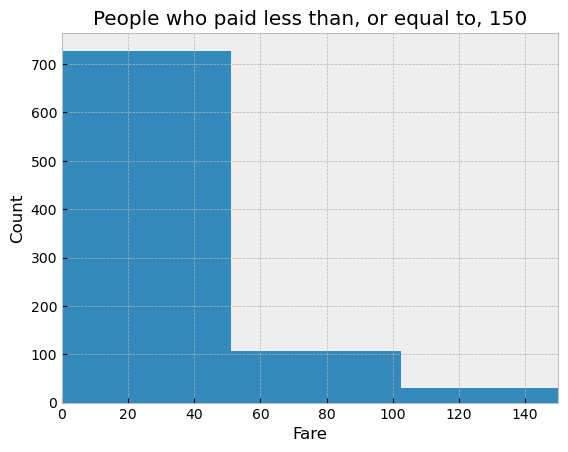

In [147]:
# ASSIGNMENT:
# Plot a histogram over the people who paid less than, or equal to, 150.
# label the plot and the axes appropriately

# YOUR CODE HERE
plt.hist(fare)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.xlim(0,150)
plt.title("People who paid less than, or equal to, 150")
plt.show()

#### Assignment j)

Text(0.5, 1.0, 'Vizualization of all ages')

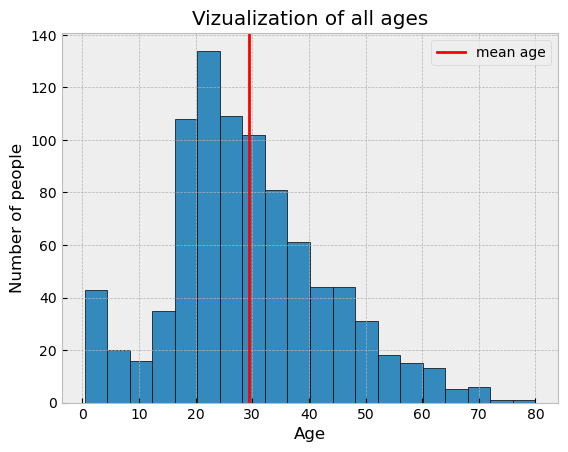

In [156]:
# ASSIGNMENT:
# plot a histogram over all the ages with 20 bins. Draw a vertical line at the mean age.
# label the plot and the axes appropriately

# YOUR CODE HERE
plt.hist(df.Age, bins=20, edgecolor='black')
plt.axvline(np.mean(df.Age), color='red', label='mean age')
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.legend()
plt.title("Vizualization of all ages")


#### Assignment k)

Sometimes it is better to plot the figures together in one figure instead. This can be done with subplot, as shown in the examples above.

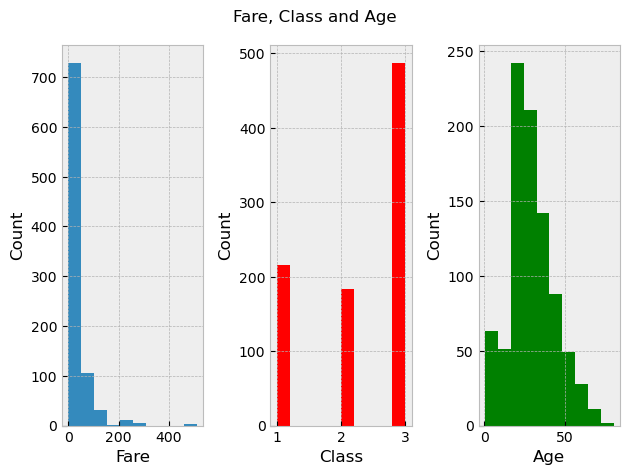

In [184]:
# ASSIGNMENT:
# Make a subplot over the Fare, Class, and Age
# label the plot and the axes appropriately

# YOUR CODE HERE
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle("Fare, Class and Age")

#add subplot for Fare
ax1.hist(df.Fare, lw=2)
ax1.set_ylabel('Count')
ax1.set_xlabel('Fare')
#add subplot for Class 
ax2.hist(df.Pclass, color='red', lw=2)
ax2.set_ylabel('Count')
ax2.set_xlabel('Class')
#add subplot for Age
ax3.hist(df.Age, color='green', lw=2)
ax3.set_ylabel('Count')
ax3.set_xlabel('Age')
fig.tight_layout()



#### Assignment l)

Now we want to compare the fare and class, as we did before, but this time we want to divide them into two colors, depending on if they survived or not.

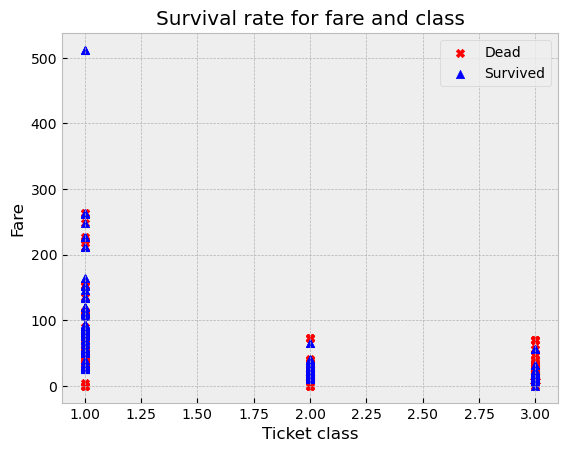

In [193]:
# ASSIGNMENT:
# Make a scatter plot with fare on the y-axis 
# and class on the x-axis 
# using red dots for all the people who died
# and blue dots for the people who survived.
# use different markers for the survived and died points
# label the plot and the axes appropriately

# YOUR CODE HERE
# x-axis (class: dead & survived)
class_dead = df[df['Survived'] == 0]['Pclass']
class_survived = df[df['Survived'] == 1]['Pclass']

# y-axis (Fare: dead & survived)
fare_dead = df[df['Survived'] == 0]['Fare']
fare_survived = df[df['Survived'] == 1]['Fare']

plt.scatter(class_dead, fare_dead, marker='X', color='red', label='Dead')
plt.scatter(class_survived, fare_survived, marker='^', color='blue', label='Survived')

plt.xlabel("Ticket class")
plt.ylabel("Fare")
plt.title("Survival rate for fare and class")
plt.legend()
plt.show()


#### Assignment m)

It might also be interesting to visualize how many of the men and women survived. This can be done with the bar function, which will be given to you.

81 464


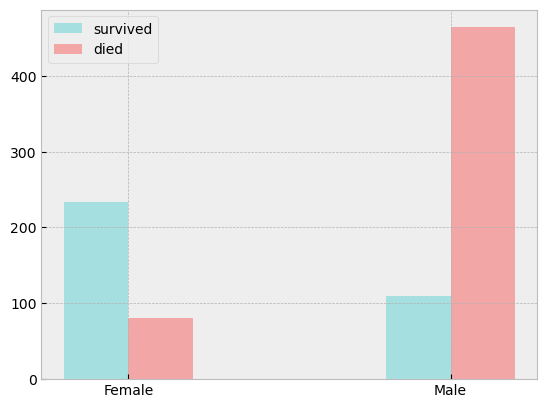

In [208]:
# ASSIGNMENT:
# Calculate how many women and men died and survived.
# label the plot and the axes appropriately

# YOUR CODE HERE
total_deaths = df[df['Survived'] == 0]
female_died, male_died = total_deaths.groupby('Sex')['Survived'].count()
print(female_died, male_died)

plt.bar([0.9,1.9], [female_survived, male_survived] , color='c', label='survived', width=0.2, alpha=0.3)
plt.bar([1.1, 2.1], [female_died, male_died] , color='r', label='died', width=0.2, alpha=0.3)
plt.xticks([1,2], ['Female','Male'])
plt.legend()
plt.show()

In [ ]:
### (Optional) Ploting a  histogram of a random distribution

OPTIONAL:  
Plotting a Histogram of Random values

Your task is to generate 10000 random numbers that follows the normal distribution, with a mean, $\mu = 1$, and variance $\sigma^2 = 0.25$. 

Plot the **normalized** histogram with 50 bars and a contour plot.   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
np.random.seed(42)

# OPTIONAL ASSIGNMENT:
# Draw 10000 random values from a normal distribution with:
#   mu = 1, sigma2 = 0.25
#  
# Plot the histogram and cumulative distribution 
# label the plot and the axes appropriately


# YOUR CODE HERE

plt.show()